In [ ]:
!pip3 install torch torchvision torchaudio

In [ ]:
!pip3 install stable-baselines3[extra] protobuf==3.20.*

In [ ]:
!sudo apt install tesseract-ocr -y

In [ ]:
!sudo apt-get install python3-tk python3-dev -y

In [ ]:
!pip install mss pyautogui pytesseract

In [1]:
from mss import mss
import pyautogui
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
from gymnasium import Env
from gymnasium.spaces import Box, Discrete

import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

'7”\n'

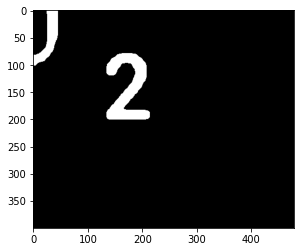

In [30]:
game_location = {'top': 125, 'left': 50, 'width': 60, 'height': 50}
img = mss().grab(game_location)
img = cv2.resize(np.array(img)[:, :, :3], (0, 0), fx=8, fy=8)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr = cv2.cvtColor(cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1], cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(thr, cv2.COLOR_BGR2RGB))
pytesseract.image_to_string(thr, config="--psm 10 -c page_separator=''")

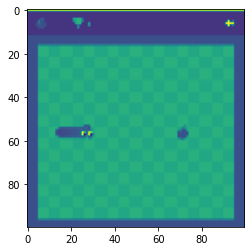

In [29]:
plt.imshow(env.reset()[0][0])

In [2]:
class WebGame(Env):
    def __init__(self):
        super().__init__()
        # Setup spaces
        self.observation_space = Box(low=0, high=255, shape=(1,200,200), dtype=np.uint8)
        self.action_space = Discrete(4)
        # Capture game frames
        self.cap = mss()
        self.game_location = {'top': 100, 'left': 0, 'width': 600, 'height': 600}
        self.done_location = {'top': 600, 'left': 635, 'width': 75, 'height': 50}
        self.score_location = {'top': 125, 'left': 50, 'width': 60, 'height': 50}

    def step(self, action):
        action_map = {
            0: 'up',
            1: 'down',
            2: 'left',
            3: 'right'
        }
        pyautogui.press(action_map[action])

        reward, done = 0, False
#         if action != self.previous_action:
#             reward = 0.01
#             self.previous_action = action
        observation = self.get_observation()
        if self.frame == 2:
            done, done_cap = self.get_done() 
            self.frame = 0
        else:
            self.frame += 1
            if self.frame == 2:
                score = self.get_score()
                if score != self.previous_score:
                    reward = 1
                    self.previous_score = score
        
        info = {}
#         if done:
#             reward = -0.1
#         if (self.previous_action == 0 and action == 3) or (self.previous_action == 3 and action == 0):
#             reward = 1
#         self.previous_action = action
        return observation, reward, done, False, info

    def reset(self, **kwargs):
        self.previous_score = "0\n" 
        time.sleep(0.5)
        pyautogui.click(x=600, y=600)
        time.sleep(0.5)
        pyautogui.press('up')
        self.frame = 2
#         self.previous_action = 0
        return self.get_observation(), {}

    def get_observation(self):
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3].astype(np.uint8)
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (200,200))
        channel = np.reshape(resized, (1,200,200))
        return channel

    def get_score(self):
        score_cap = np.array(self.cap.grab(self.score_location))[:, :, :3]
        img = cv2.resize(score_cap, (0, 0), fx=8, fy=8)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        thr = cv2.cvtColor(cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1], cv2.COLOR_BGR2RGB)
        score_string = pytesseract.image_to_string(thr, config="--psm 10 -c page_separator=''")
        score = score_string
        return score

    def get_done(self):
        done_cap = np.array(self.cap.grab(self.done_location))[:, :, :3]
        img = cv2.resize(done_cap, (0, 0), fx=8, fy=8)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        thr = cv2.cvtColor(cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1], cv2.COLOR_BGR2RGB)
        done = False
        res = pytesseract.image_to_string(thr)
        if 'play' in res.lower():
            done = True
        return done, done_cap

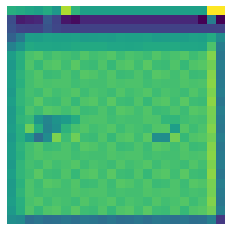

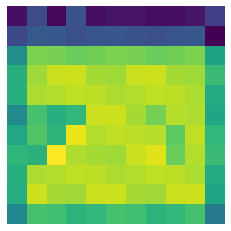

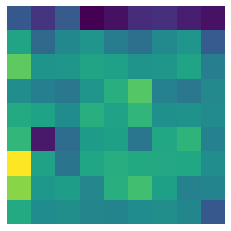

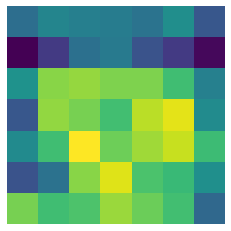

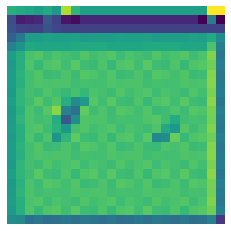

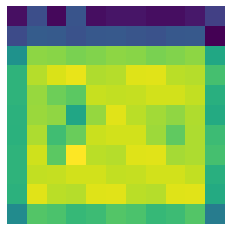

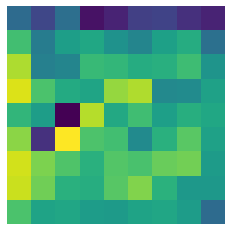

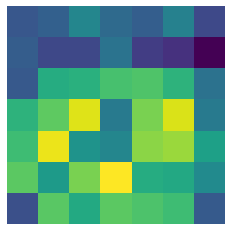

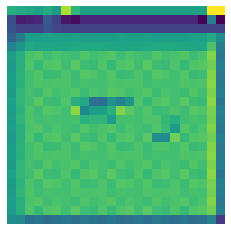

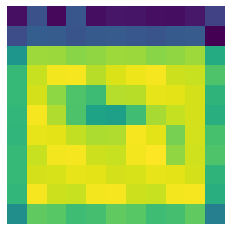

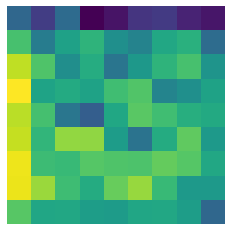

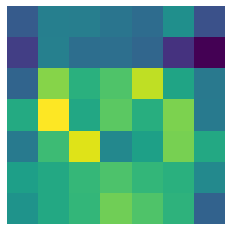

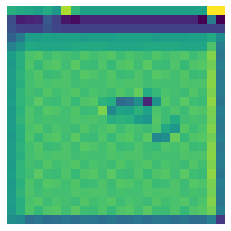

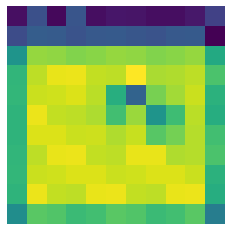

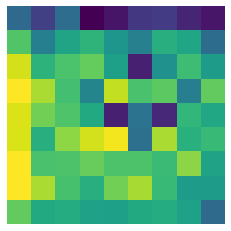

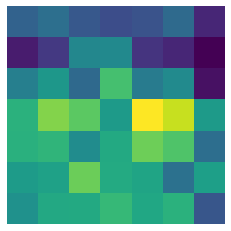

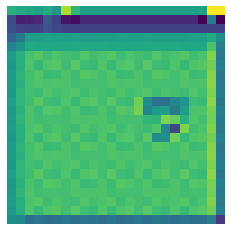

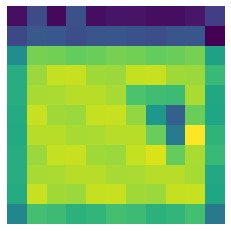

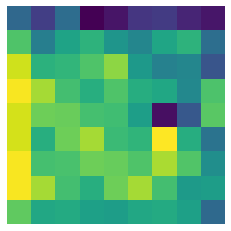

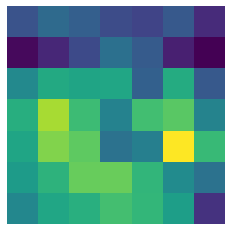

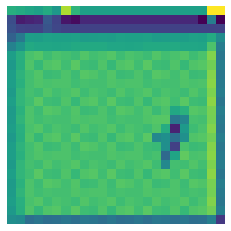

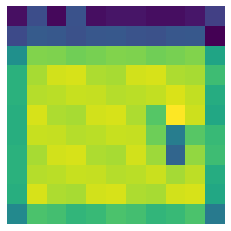

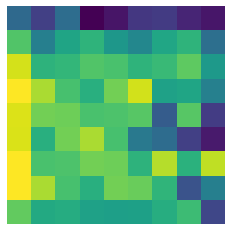

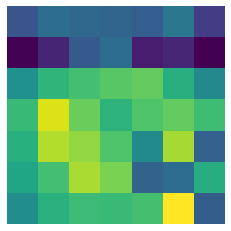

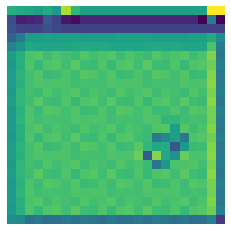

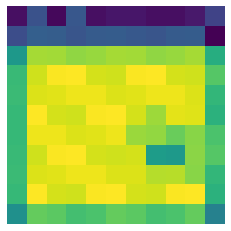

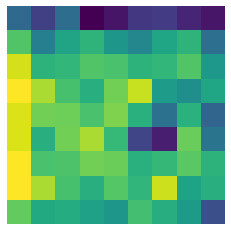

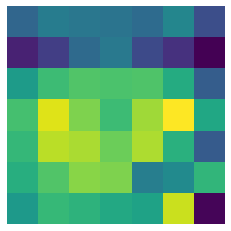

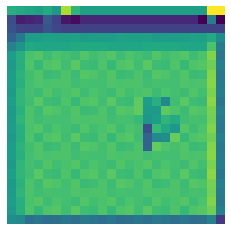

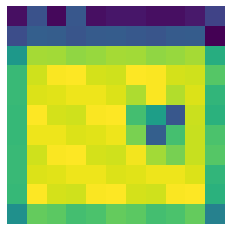

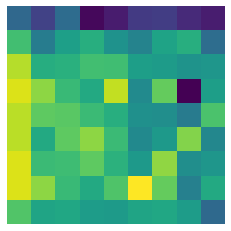

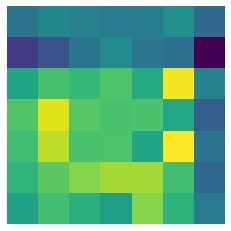

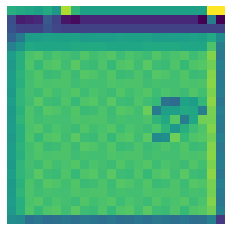

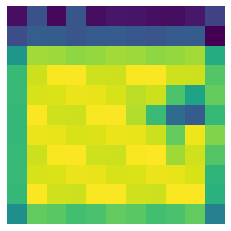

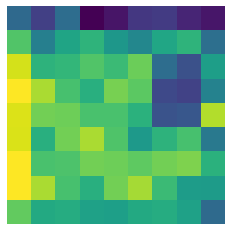

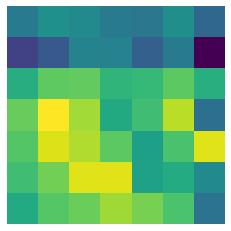

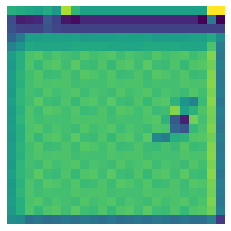

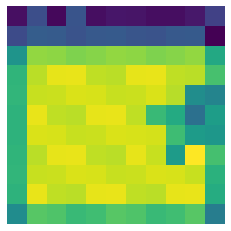

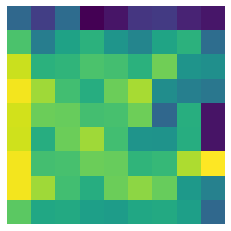

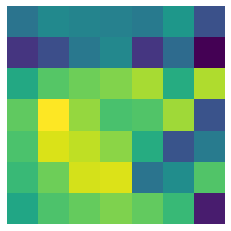

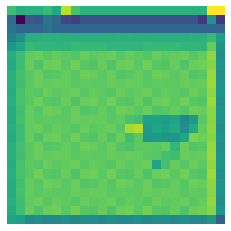

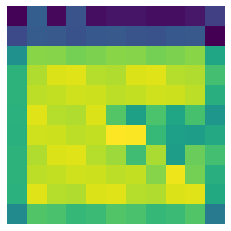

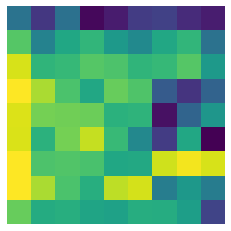

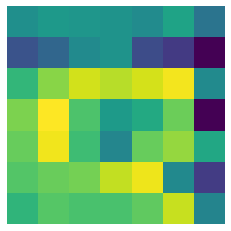

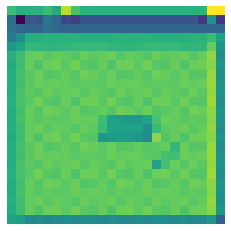

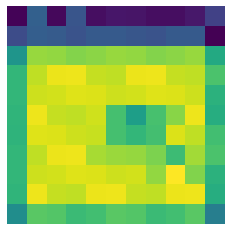

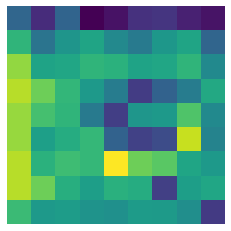

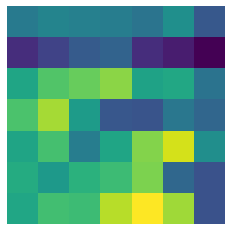

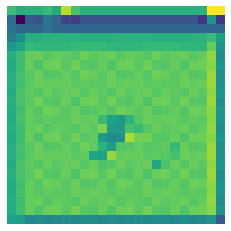

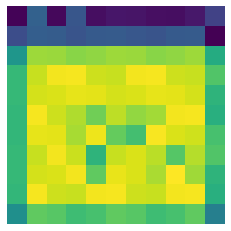

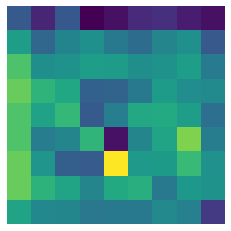

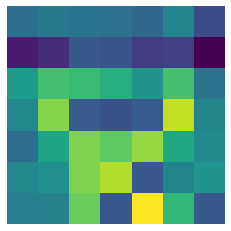

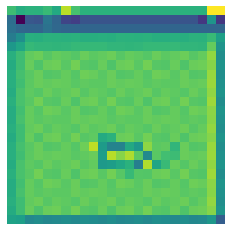

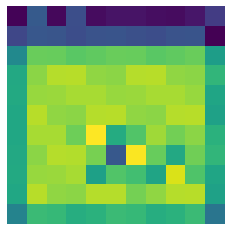

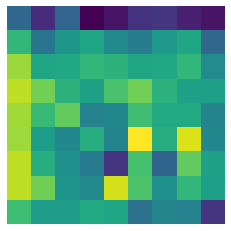

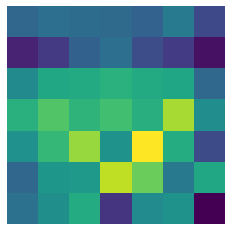

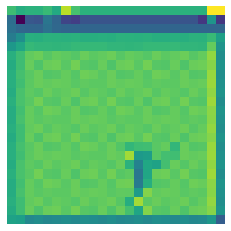

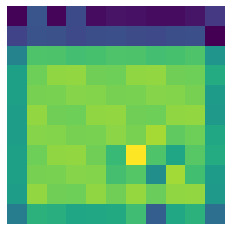

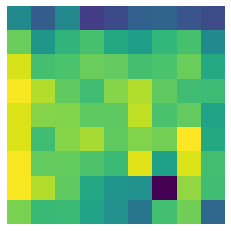

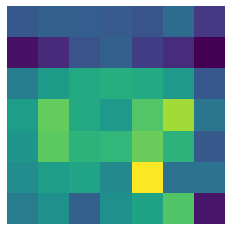

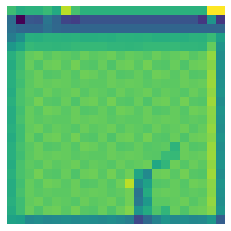

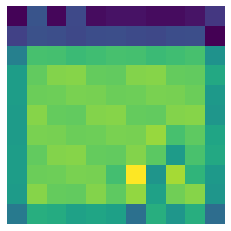

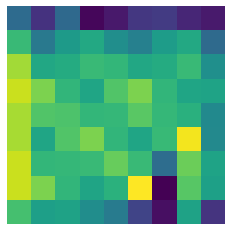

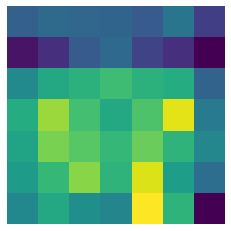

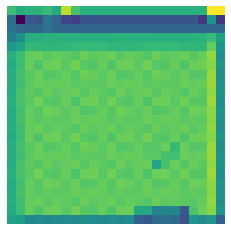

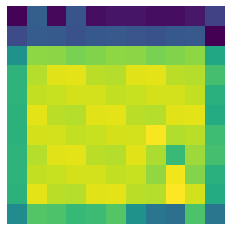

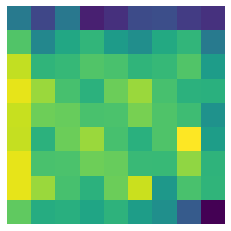

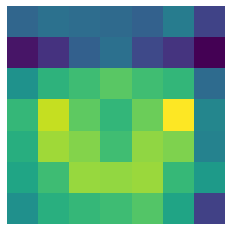

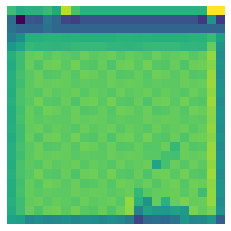

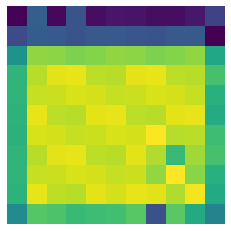

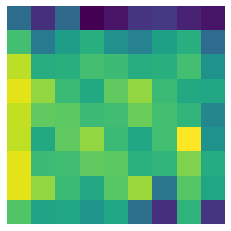

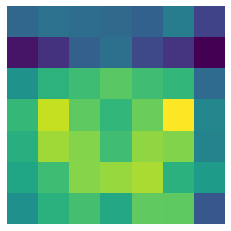

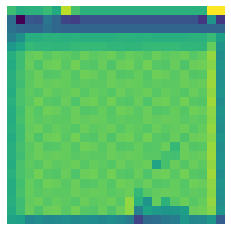

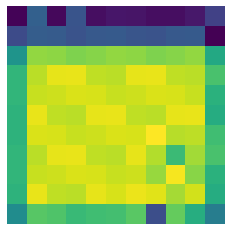

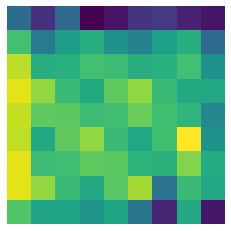

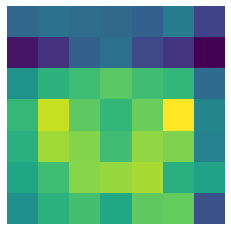

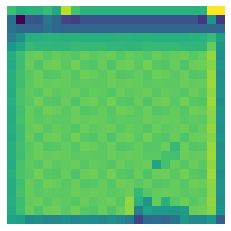

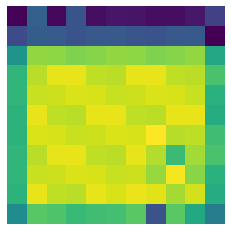

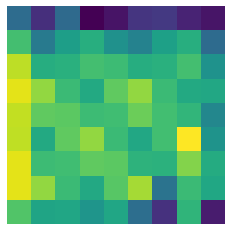

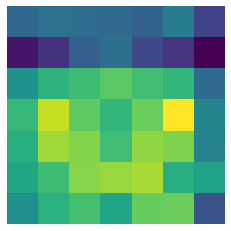

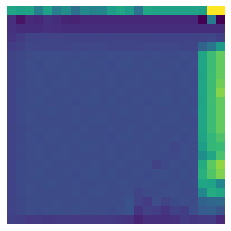

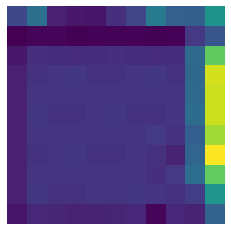

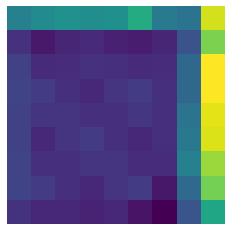

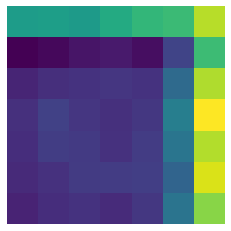

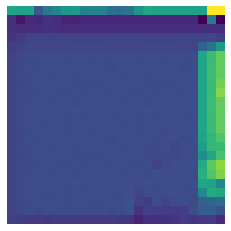

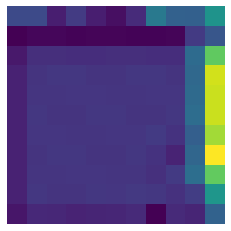

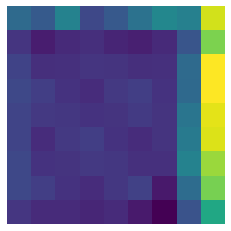

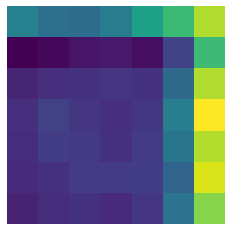

Total Reward for episode 0 is 1


In [34]:
env = WebGame()

for episode in range(1):
    obs = env.reset()
    terminated = False
    total_reward = 0
#     obs, reward, terminated, truncated, info =  env.step(3)
#     obs, reward, terminated, truncated, info =  env.step(1)
    while not terminated:
        action = model.predict(obs[0].reshape((1, 100, 100)))
        features = get_intermediate_output(model.policy.features_extractor.cnn, torch.tensor(obs[0].reshape((1, 1, 100, 100)), dtype=torch.float32), 2)
        visualize_important_feature(features)
        features = get_intermediate_output(model.policy.features_extractor.cnn, torch.tensor(obs[0].reshape((1, 1, 100, 100)), dtype=torch.float32), 5)
        visualize_important_feature(features)
        features = get_intermediate_output(model.policy.features_extractor.cnn, torch.tensor(obs[0].reshape((1, 1, 100, 100)), dtype=torch.float32), 8)
        visualize_important_feature(features)
        features = get_intermediate_output(model.policy.features_extractor.cnn, torch.tensor(obs[0].reshape((1, 1, 100, 100)), dtype=torch.float32), 11)
        visualize_important_feature(features)
        # print(action)
        obs, reward, terminated, truncated, info =  env.step(int(action[0]))
        total_reward  += reward
#         if reward != 0:
#             print(terminated, env.get_score(), reward)
    print('Total Reward for episode {} is {}'.format(episode, total_reward))   

In [ ]:
print("Observation Space:", env.observation_space)
print("Observation Shape:", obs[0].shape)
try:
    action = model.predict(obs[0].reshape((1, 100, 100)))
except ValueError as e:
    print("An error occurred:", e)


In [3]:
# Import os for file path management
import os 
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback
# Check Environment    
from stable_baselines3.common import env_checker

In [8]:
env_checker.check_env(env)

In [4]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [10]:
CHECKPOINT_DIR = './train/post41/post2' # post40/post2/post1/post/post2/post/post/post1/post1/post/post1/post1_2/post2_3' # post37/post/post/post/post/post/post/post/post/post/post/post1_2/post2_2/post_2/post2_2/post_2/post_2/post_4'
LOG_DIR = './logs/post41'

In [11]:
callback = TrainAndLoggingCallback(check_freq=5000, save_path=CHECKPOINT_DIR)

In [7]:
from stable_baselines3 import PPO, DQN

In [8]:
env = WebGame()

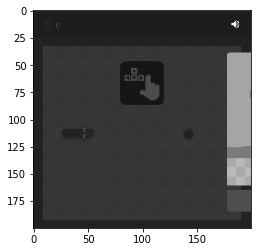

In [11]:
plt.imshow(cv2.cvtColor(env.get_observation()[0], cv2.COLOR_BGR2RGB))

In [12]:
model = PPO.load('./train/post41/best_model_10000.zip', env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [21]:
from torchvision.models import mobilenet_v3_large

model = mobilenet_v3_large()

In [11]:
model.policy.pi_features_extractor.cnn

Sequential(
  (0): Conv2d(1, 64, kernel_size=(8, 8), stride=(4, 4))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2))
  (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU()
  (12): Flatten(start_dim=1, end_dim=-1)
)

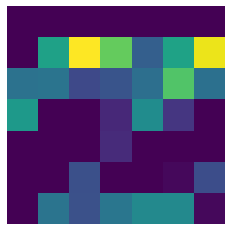

In [16]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Function to capture intermediate output
def get_intermediate_output(model, input_data, layer_num):
    temp_model = torch.nn.Sequential(*(list(model.children())[:layer_num+1]))
    with torch.no_grad():
        intermediate_output = temp_model(input_data)
    return intermediate_output

# Function to visualize the most "important" feature map
def visualize_important_feature(features):
    feature_maps = features.squeeze().cpu().numpy()
    # Compute sum or mean along x, y dimensions for each feature map
    importance = np.sum(np.abs(feature_maps), axis=(1, 2))
    
    # Find the index of the feature map with the greatest sum or mean
    most_important_idx = np.argmax(importance)
    
    plt.imshow(feature_maps[most_important_idx], cmap='viridis')
    plt.axis('off')
    plt.show()

# Assume you have loaded or trained a Stable Baselines 3 PPO model
# model = PPO.load("your_model_path")
# Also assume 'obs' is a single observation from your environment, shaped correctly

obs = env.reset()

# Get intermediate features
layer_num = 11  # Replace with the layer number you're interested in
features = get_intermediate_output(model.policy.features_extractor.cnn, torch.tensor(obs[0][np.newaxis, :, :, :], dtype=torch.float32), layer_num)

# Visualize the most "important" feature map
visualize_important_feature(features)


In [13]:
env.reset()

(array([[[238, 238, 238, ..., 238, 238, 238],
         [ 96,  96,  96, ...,  96,  96,  96],
         [ 96,  96,  96, ...,  96,  96,  96],
         ...,
         [113, 113, 113, ..., 113, 113, 113],
         [113, 113, 113, ..., 113, 113, 113],
         [113, 113, 113, ..., 113, 113, 113]]], dtype=uint8),
 {})

In [26]:
import torch as th
from gymnasium import spaces
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor

class CustomMobileNet(BaseFeaturesExtractor):
    
    def __init__(self, observation_space: spaces.Box, features_dim: int = 512):
        super().__init__(observation_space, features_dim)
        n_input_channels = observation_space.shape[0]
        
        self.model = mobilenet_v3_large()
        
        self.model.features[0][0] = th.nn.Conv2d(n_input_channels, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

        self.model.classifier[3] = th.nn.Linear(self.model.classifier[3].in_features, features_dim, bias=True)

    def forward(self, observations: th.Tensor) -> th.Tensor:
        return self.model(observations)

In [44]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0003, n_steps=128, ent_coef=0.01, gamma=0.97, policy_kwargs=dict(features_extractor_class=CustomNatureCNN))
# model = DQN('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, buffer_size=10000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
model.learn(total_timesteps=11000, callback=callback)

Logging to ./logs/post41/PPO_4
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 15.6     |
|    ep_rew_mean     | 0        |
| time/              |          |
|    fps             | 3        |
|    iterations      | 1        |
|    time_elapsed    | 36       |
|    total_timesteps | 128      |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 14.6       |
|    ep_rew_mean          | 0          |
| time/                   |            |
|    fps                  | 2          |
|    iterations           | 2          |
|    time_elapsed         | 101        |
|    total_timesteps      | 256        |
| train/                  |            |
|    approx_kl            | 0.04693195 |
|    clip_fraction        | 0.62       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.05      |
|    explained_variance   | -0.678     |
|    learning_

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 15.6        |
|    ep_rew_mean          | 0           |
| time/                   |             |
|    fps                  | 2           |
|    iterations           | 12          |
|    time_elapsed         | 715         |
|    total_timesteps      | 1536        |
| train/                  |             |
|    approx_kl            | 0.045430664 |
|    clip_fraction        | 0.595       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.93       |
|    explained_variance   | -3.5        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.109      |
|    n_updates            | 890         |
|    policy_gradient_loss | -0.0404     |
|    value_loss           | 0.000755    |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 15.5    

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 16.8       |
|    ep_rew_mean          | 0.01       |
| time/                   |            |
|    fps                  | 2          |
|    iterations           | 22         |
|    time_elapsed         | 1324       |
|    total_timesteps      | 2816       |
| train/                  |            |
|    approx_kl            | 0.08251998 |
|    clip_fraction        | 0.584      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.06      |
|    explained_variance   | -0.00707   |
|    learning_rate        | 0.0003     |
|    loss                 | -0.105     |
|    n_updates            | 990        |
|    policy_gradient_loss | -0.0579    |
|    value_loss           | 0.0265     |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 16.4       |
|    ep_rew_mean

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 18         |
|    ep_rew_mean          | 0.03       |
| time/                   |            |
|    fps                  | 2          |
|    iterations           | 32         |
|    time_elapsed         | 1922       |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.10196182 |
|    clip_fraction        | 0.6        |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.24      |
|    explained_variance   | -2.25      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.128     |
|    n_updates            | 1090       |
|    policy_gradient_loss | -0.0745    |
|    value_loss           | 0.00052    |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 17.9        |
|    ep_rew_m

In [2]:
!tensorboard --logdir=logs/post41/PPO_1

TensorFlow installation not found - running with reduced feature set.
/home/vini_suaiden/.local/lib/python3.9/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /home/vini_suaiden/.local/lib/python3.9/site-packages/tensorboard_data_server/bin/server)
/home/vini_suaiden/.local/lib/python3.9/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /home/vini_suaiden/.local/lib/python3.9/site-packages/tensorboard_data_server/bin/server)
/home/vini_suaiden/.local/lib/python3.9/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.32' not found (required by /home/vini_suaiden/.local/lib/python3.9/site-packages/tensorboard_data_server/bin/server)
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.14.0 at http://localhost:6006/ (Press CTRL+C to quit)


In [15]:
!ls logs/post40

PPO_1	PPO_12	PPO_15	PPO_18	PPO_20	PPO_23	PPO_5  PPO_8
PPO_10	PPO_13	PPO_16	PPO_19	PPO_21	PPO_3	PPO_6  PPO_9
PPO_11	PPO_14	PPO_17	PPO_2	PPO_22	PPO_4	PPO_7


In [57]:
!rm -r train/post31_2

In [32]:
!ls /home/vini_suaiden/.local/lib/python3.9/site-packages

AutoROM
AutoROM-0.6.1.dist-info
AutoROM.accept_rom_license-0.6.1.dist-info
AutoROM.py
EasyProcess-1.1.dist-info
Farama_Notifications-0.0.4.dist-info
Markdown-3.4.4.dist-info
MarkupSafe-2.0.1.dist-info
MouseInfo-0.1.3.dist-info
PIL
Pillow-10.0.0.dist-info
Pillow.libs
PyAutoGUI-0.9.54.dist-info
PyGetWindow-0.0.9.dist-info
PyMsgBox-1.0.9.dist-info
PyRect-0.2.0.dist-info
PyScreeze-0.1.29.dist-info
Pygments-2.16.1.dist-info
Shimmy-1.1.0.dist-info
Xlib
__pycache__
absl
absl_py-1.4.0.dist-info
ale_py
ale_py-0.8.1.dist-info
cachetools
cachetools-5.3.1.dist-info
click
click-8.1.7.dist-info
cloudpickle
cloudpickle-2.2.1.dist-info
cmake
cmake-3.27.2.dist-info
contourpy
contourpy-1.1.0.dist-info
cv2
cycler-0.11.0.dist-info
cycler.py
dateutil
easyprocess
entrypoint2
entrypoint2-1.1.dist-info
farama_notifications
filelock
filelock-3.12.3.dist-info
fontTools
fonttools-4.42.1.dist-info
functorch
google
google_auth-2.22.0.dist-info
google_auth_oauthlib
google_auth_oauthlib-1.0.0.dist-info
grpc
grpcio-1

In [19]:
!pip install pygad

     |████████████████████████████████| 80 kB 4.2 MB/s eta 0:00:011


In [43]:
from torch import nn
import torch as th
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor

class CustomNatureCNN(BaseFeaturesExtractor):
    def __init__(self, observation_space, features_dim=512):
        super().__init__(observation_space, features_dim)

        n_input_channels = observation_space.shape[0]
        
        self.cnn = nn.Sequential(
            nn.Conv2d(n_input_channels, 64, kernel_size=8, stride=4),  # Increased to 64 filters
            nn.BatchNorm2d(64),  # Added BatchNorm
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2),  # Increased to 128 filters
            nn.BatchNorm2d(128),  # Added BatchNorm
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1),  # Maintained at 128 filters
            nn.BatchNorm2d(128),  # Added BatchNorm
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=1),  # New Layer
            nn.BatchNorm2d(256),  # New Layer
            nn.ReLU(),  # New Layer
            nn.Flatten(),
        )

        with th.no_grad():
            n_flatten = self.cnn(th.as_tensor(observation_space.sample()[None]).float()).shape[1]

        self.linear = nn.Sequential(
            nn.Linear(n_flatten, features_dim * 2),
            nn.BatchNorm1d(features_dim * 2),  # Added BatchNorm
            nn.ReLU(),
            nn.Dropout(0.2),  # Added Dropout
            
            nn.Linear(features_dim * 2, features_dim),  # New Layer
            nn.BatchNorm1d(features_dim),  # New Layer
            nn.ReLU(),  # New Layer
            nn.Dropout(0.2),  # New Layer
        )

    def forward(self, x):
        x = self.cnn(x)
        return self.linear(x)

In [69]:
def mutate_model(model, mutation_rate=0.5):
    for param in model.parameters():
        noise = th.randn_like(param.data) * mutation_rate
        param.data += noise

In [70]:
def fitness(model):
    with th.no_grad():
        obs = env.reset()
        terminated = False
        total_reward = 0
        while not terminated:
            action = model(th.from_numpy(obs[0].reshape((1, 1, 100, 100))).float())
            obs, reward, terminated, truncated, info =  env.step(int(th.argmax(action[0])))
            total_reward  += reward
        print(total_reward)
    return total_reward

In [ ]:
import copy
import numpy as np

# 0.5 0.5 0.1
# best_net = NatureCNNAction(env.observation_space, env.action_space)

for i in range(20):
    models, fitnesses = [best_net], np.array([fitness(best_net)])

    for j in range(5):
        new_net = copy.deepcopy(best_net)
        mutate_model(new_net, 0.005)
        models += [new_net]
        fitnesses = np.append(fitnesses, fitness(new_net))

    if np.argmax(fitnesses) != 0:
        if fitness(models[np.argmax(fitnesses)]) > fitness(models[0]):
            best_net = models[np.argmax(fitnesses)]

1.06
0.060000000000000005
0.09
0.09999999999999999
2.06
1.06
2.04
0.07
0.04
0.08
2.06
1.04
0.08
1.06
0.08
1.04
0.07
1.06
1.07
0.07
1.06
1.06
0.04
0.07
0.04
2.06
0.08
0.08
1.06
0.11999999999999998
1.09
0.07
1.04
0.04
1.04
0.060000000000000005
0.10999999999999999
0.060000000000000005
1.06
1.04
1.08
0.060000000000000005
0.04
0.060000000000000005
1.07
2.06
1.04
2.06
1.06
2.04
1.04
2.06
1.04
2.06
1.04
0.04
2.06
1.06
2.04
1.06
2.06
2.04
0.08
0.060000000000000005
1.08
0.05
2.04
1.04
0.04
0.04
1.06
0.08
1.09
1.06
1.08
2.06
0.09999999999999999
2.04
2.06
1.06
2.04
0.07
1.04
1.04
1.04
0.07
2.04
1.08
1.06
0.060000000000000005
0.04
1.04
0.04
0.07
0.060000000000000005
1.04
0.11999999999999998
0.08
0.060000000000000005
2.04
1.06
2.06
0.04
0.060000000000000005
0.08
0.04
1.06
2.06
2.04
1.06
1.08
2.04
1.04
0.060000000000000005
2.04
1.06
0.04
0.09999999999999999
1.04
2.04
0.04
0.060000000000000005
1.04
0.060000000000000005
2.04
2.06
2.06
1.06
1.08
2.04
2.06
0.060000000000000005
0.07
0.09
0.06000000000000

In [40]:
def nfitness(model):
    with th.no_grad():
        obs = env.reset()
        terminated = False
        total_reward = 0
        while not terminated:
            action = model(th.from_numpy(obs[0].reshape((1, 1, 100, 100))).float())
            print(action)
            obs, reward, terminated, truncated, info =  env.step(int(th.argmax(action[0])))
            total_reward  += reward
    return total_reward

In [41]:
nfitness(best_net)

tensor([[ -6075117.5000, -12665053.0000,  -4357501.0000,  13417721.0000]])
tensor([[ -5744485.5000, -12922911.0000,  -4502274.0000,  13395107.0000]])
tensor([[ -5707320., -12637107.,  -4278970.,  13455169.]])
tensor([[ -5553894.0000, -12813138.0000,  -3822536.7500,  13628059.0000]])
tensor([[ -5608212.5000, -12304506.0000,  -4338696.0000,  14077524.0000]])
tensor([[ -6218174.5000, -12369713.0000,  -4339256.5000,  13903437.0000]])
tensor([[ -6188797., -12096056.,  -4477908.,  13864024.]])
tensor([[ -6585523.5000, -12358921.0000,  -4608738.5000,  13571783.0000]])
tensor([[ -6314320.5000, -12822255.0000,  -4771091.5000,  13461155.0000]])
tensor([[ -6208064.5000, -12716905.0000,  -4766095.5000,  13462622.0000]])
tensor([[ -6258193.5000, -12514149.0000,  -4626580.5000,  13564372.0000]])
tensor([[ -6099686.5000, -12424120.0000,  -4835744.0000,  13765049.0000]])
tensor([[ -6113037.5000, -12391699.0000,  -4766543.5000,  13573074.0000]])
tensor([[ -6123784.5000, -12493047.0000,  -4901864.0000, 

0.19000000000000003

In [13]:
def encode_weights(net):
    return th.cat([p.flatten() for p in net.parameters()])

def decode_weights(vector, net):
    start = 0
    for p in net.parameters():
        end = start + p.numel()
        p.data.copy_(vector[start:end].view(p.size()))
        start = end

def fitness_func(ga_instance, solution, solution_idx):
    decode_weights(th.Tensor(solution), net)
    obs = env.reset()
    terminated = False
    total_reward = 0
    while not terminated:
        action = net(th.from_numpy(obs[0].reshape((1, 1, 100, 100))).float())
        obs, reward, terminated, truncated, info =  env.step(int(th.argmax(action[0])))
        total_reward  += reward
    print(total_reward)
    return total_reward

In [14]:
num_generations = 100
num_parents_mating = 1
#keep_parents = 1
sol_per_pop = 5

initial_population = th.randn((sol_per_pop, encode_weights(net).shape[0])).numpy()

ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    sol_per_pop=sol_per_pop,
    num_genes=initial_population.shape[1],
    init_range_low=-1,
    init_range_high=1,
    #parent_selection_type="rank",
    #keep_parents=keep_parents,
    keep_elitism=1,
    crossover_type=None,
    mutation_type="random",
    mutation_probability=1.0
)

In [15]:
ga_instance.run()

0.16
0.22000000000000006
0.16
0.19000000000000003
0.19000000000000003
0.16
0.16
0.16
0.16
0.16
0.19000000000000003
0.16
0.16
0.16
0.12999999999999998
0.16
0.16
0.16
0.16
0.12999999999999998
0.16
0.16
0.16
0.19000000000000003
0.09999999999999999
0.16
0.19000000000000003
0.16
0.16
0.19000000000000003
0.16
0.12999999999999998
0.16
0.16
0.12999999999999998
0.16
0.16
0.12999999999999998
0.19000000000000003
0.16
0.16
0.16
0.19000000000000003
0.16
0.19000000000000003
0.12999999999999998
0.19000000000000003
0.16
0.19000000000000003
0.16
0.19000000000000003
0.12999999999999998
0.12999999999999998
0.16
0.16
0.16
0.16
0.19000000000000003
0.16
0.12999999999999998
0.16
0.16
0.16
0.19000000000000003
0.12999999999999998
0.12999999999999998
0.16
0.25000000000000006
0.16
0.09999999999999999
0.16
0.19000000000000003
0.16
0.16
0.16
0.12999999999999998
0.16
0.19000000000000003
0.16
0.16
0.16
0.16
0.12999999999999998
0.19000000000000003
0.16
0.16
0.19000000000000003
0.16
0.12999999999999998
0.16
0.16
0.16


In [31]:
obs = env.reset()

In [55]:
obs[0].reshape((1, 100, 100))

array([[[238, 238, 238, ..., 238, 238, 238],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [238, 238, 238, ..., 238, 238, 238],
        [238, 238, 238, ..., 238, 238, 238],
        [238, 238, 238, ..., 238, 238, 238]]], dtype=uint8)

In [7]:
!rm -r train/post36